## pandas, seaborn, and sklearn required

In [5]:
import pandas as pd ##pandas dataframes are often used for statistical analysis,
import numpy as np ##calculate mean and standard deviation
import seaborn as sb ##includes convenient heatmaps and boxplots
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression
%matplotlib inline

In [6]:
data = pd.read_csv('data.csv') ##store csv in Pandas DataFrame

In [7]:
data.head() ##print first five rows of dataframe as a table

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data = data.drop('id', 1) ##id column provides no information on data
data = data.drop('Unnamed: 32', 1) ##column of missing values

In [9]:
print(pd.get_dummies(data['diagnosis']).head(1))#dummy variable to represent categorical data as numeric
data['diagnosis_dummies'] = pd.get_dummies(data['diagnosis']).iloc[:,1]#extract Malignant dummy category to dataframe
###only inclulde one dummy category to avoid multicollinearity, either one could be chosen

   B  M
0  0  1


In [10]:
datacorr = data.corr() #correlation matrix, showing correlation between each variable and all the others
data.corr().head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_dummies
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560


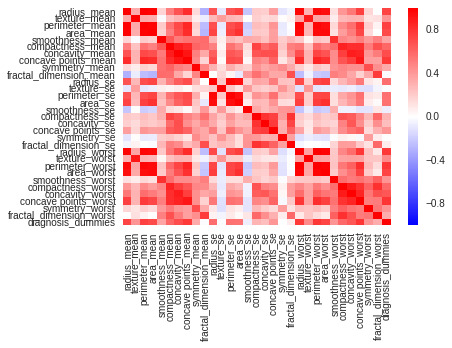

In [11]:
sb.heatmap(datacorr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

### Two highly correlated variables should not be both used in model, therefore PCA will later be performed to explain the same variance while avoiding multicollinearity

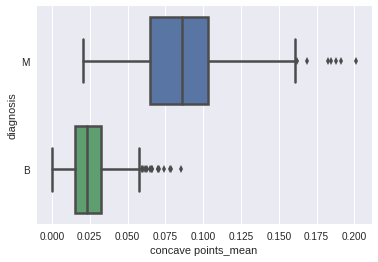

In [12]:
sb.boxplot(x=data['concave points_mean'], y=data['diagnosis'], data=data, linewidth=2.5) #boxplot
###boxplot shows the distribution by classification of concave points_mean, chosen because 
###it had the highest correlation with the diagnosis dummy variable. There is a clear difference in distributions.

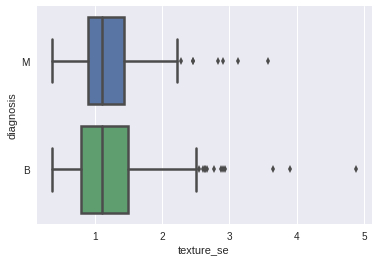

In [13]:
sb.boxplot(x=data['texture_se'], y=data['diagnosis'], data=data, linewidth=2.5)
###For comparison, this is the same boxplot construct with a variable that is minimally correlated with diagnosis

In [14]:
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [15]:
data_stnd = data.drop(['diagnosis','diagnosis_dummies'], 1).apply(standardization,broadcast = True) 
##drop response variable and standardize predictor variables
data_stnd.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Since there are 30 variables and many of them are highly correlated with other variables, PCA is a good choice to reduce dimensionality and isolate the useful variance for the logistic regression model

In [16]:
X = data_stnd #store predictor variables
y = data['diagnosis_dummies'] #store response variable
pca = skdc.PCA() #empty model space

In [17]:
pcafit = pca.fit_transform(X,y) ##apply dimensionality reduction to X

In [18]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))
###Since 29 components aren't necessary, the last 20 PCs will be disregarded 
###since they explain less than.01 of the variance
print(sum(var_explained[0:10]))
##indeed,the first 10 PCs explain 95% of the variance

0     0.442720
1     0.189712
2     0.093932
3     0.066021
4     0.054958
5     0.040245
6     0.022507
7     0.015887
8     0.013896
9     0.011690
10    0.009797
11    0.008705
12    0.008045
13    0.005234
14    0.003138
15    0.002662
16    0.001980
17    0.001754
18    0.001649
19    0.001039
20    0.000999
21    0.000915
22    0.000811
23    0.000602
24    0.000516
25    0.000273
26    0.000230
27    0.000053
28    0.000025
29    0.000004
dtype: float64
0.951568814337


In [19]:
pca = skdc.PCA() #only include first 10 components
logreg = sklm.LogisticRegression()#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space

### Leave one out Cross Validation will be used to test if logistic regression using the first 10 PCs is a useful model

In [20]:
predMalignantRight = 0 #create count variables
predMalignantWrong = 0
predBenignRight = 0
predBenignWrong = 0

In [21]:
for i in range(0,569): #run through each row in data set
    trainX = X.drop(i, 0) #train model with predictor dataframe, remove single row
    trainy = y.drop(i,0) #train model with response array, remove single row
    testX = X.iloc[i,:].values.reshape(1,30) #Removed row will be test predictor (Got error message before using values.reshape)
    testy = y[i] #Removed value will be test response
    fit = pipeline.fit(trainX, trainy) #fit model
    prediction = pipeline.predict(testX) #test model with left out value
    if prediction == 1 and testy == 1:
        predMalignantRight += 1
    elif prediction == 1 and testy == 0:
        predMalignantWrong += 1
    elif prediction == 0 and testy == 1:
        predBenignWrong += 1
    else:
        predBenignRight += 1

In [22]:
print(predMalignantRight,predMalignantWrong,predBenignRight,predBenignWrong)

204 4 353 8


In [23]:
###Time to create a nice confusion matrix to visualize
c = {'Predicted Benign' : pd.Series([predBenignRight, predBenignWrong],index=['Actual Benign', 'Actual Malignant']),
    'Predicted Malignant': pd.Series([predMalignantWrong, predMalignantRight], index=['Actual Benign','Actual Malignant'])}
confusionmat = pd.DataFrame(c)
confusionmat
###nearly 98% of the values lie on the correct diagonal

,Predicted Benign,Predicted Malignant
Actual Benign,353,4
Actual Malignant,8,204


In [24]:
###Now sensitivity and specificity will be calculated
mr,mw = float(predMalignantRight), float(predMalignantWrong)
bw,br = float(predBenignWrong), float(predBenignRight)
sens = mr/(mr+mw) #calculate sensitivity, or rate of correctly predicting disease
spec = br/(br+bw) #calculate specificity, or rate of correctly predicting no disease
acc = (sens + spec)/2 #calculate balanced accuracy, or average of sensitivty and specificity
mis = (mw+bw)/(mw+bw+mr+br) #calculate misclassification rate

In [25]:
###create series of values, then convert to dataframe to print as table
outputseries = pd.Series([sens,spec,acc,mis],index=['Sensitivity','Specificity','Balanced Accuracy','Misclassification rate'])
outputdf = pd.DataFrame(outputseries)
outputdf.columns = [''] #blank header name
outputdf.head()

,
Sensitivity,0.980769
Specificity,0.977839
Balanced Accuracy,0.979304
Misclassification rate,0.021090


### A balanced accuracy of 98% is  high, suggesting using a PCA to logistic regression pipelne could be a valuable way to predict whether a breast tumor cell is malignant. The advantage of logistic regression is, given input, the model will not only output a prediction but an estimated probability. This project was successful